In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the data
merged_df = pd.read_csv('inputs/master_filtered_data.csv', low_memory=False)

# Define features and target column names
features = ['revt', 'sale', 'ebit']
target = 'IS_SPAC'

# Check which features exist in the dataset
valid_features = [col for col in features if col in merged_df.columns]

# Create a DataFrame with the required features and target
data = merged_df[valid_features + [target]]

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data[valid_features])
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Precision: 0.80
Recall: 0.17
F1 Score: 0.28

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5534
         1.0       0.80      0.17      0.28        24

    accuracy                           1.00      5558
   macro avg       0.90      0.58      0.64      5558
weighted avg       1.00      1.00      0.99      5558


Confusion Matrix:
[[5533    1]
 [  20    4]]


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the data
merged_df = pd.read_csv('inputs/master_filtered_data.csv', low_memory=False)

# Define features and target column names
features = ['adrr', 'curuscn', 'scf', 'src', 'acominc', 'acox', 'at',
            'am', 'ao', 'aoloch', 'aox', 'ap', 'at.1', 'caps', 'capx', 'cb',
            'ch', 'che', 'clg', 'cogs', 'csho', 'cshrt', 'cstk', 'dd', 'dlc',
            'dn', 'do', 'dt', 'ebit', 'ebitda', 'epspi', 'fca', 'ffo',
            'gdwl', 'gp', 'ib', 'intan', 'invt', 'lt', 'lct', 'ni',
            'niadj', 'np', 'pi', 'ppegt', 'pnrsho', 'ppent', 're', 'revt',
            'sale', 'seq', 'tdc', 'teq', 'tstk', 'txt', 'wcap', 'naicsh',
            'mkvalt', 'acchg', 'accrt', 'amc', 'ano', 'arce', 'cshi',
            'depc', 'derhedgl']
target = 'IS_SPAC'

# Check which features exist in the dataset
valid_features = [col for col in features if col in merged_df.columns]

# Create a DataFrame with the required features and target
data = merged_df[valid_features + [target]]

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data[valid_features])
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Precision: 0.72
Recall: 0.54
F1 Score: 0.62

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5534
         1.0       0.72      0.54      0.62        24

    accuracy                           1.00      5558
   macro avg       0.86      0.77      0.81      5558
weighted avg       1.00      1.00      1.00      5558


Confusion Matrix:
[[5529    5]
 [  11   13]]


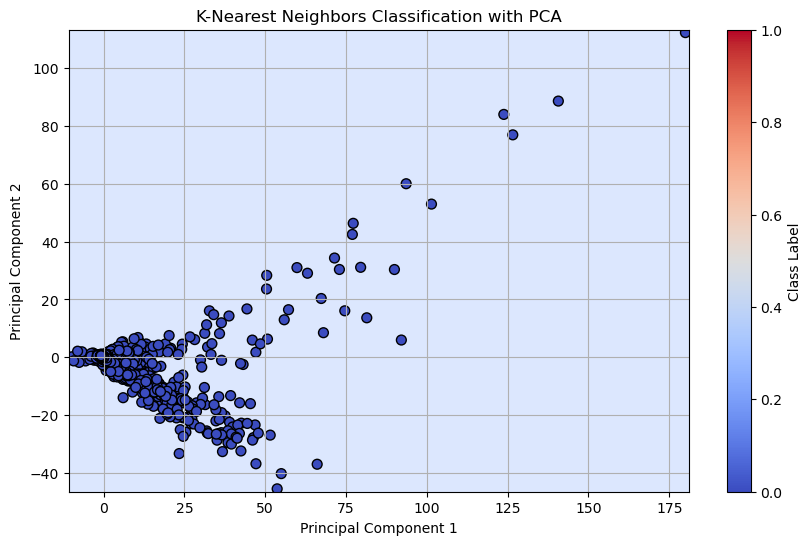

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dataset to two dimensions with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN on the PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict classifications over the grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Decision boundary regions
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.title('K-Nearest Neighbors Classification with PCA')
plt.xlabel('Principal Component 1') #  linear combination of all features
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()